This notebook is used for cleaning the data set to a format that can be input for the TF-IDF.

In [3]:
import pandas as pd

#extract the data set + convert to data frame
data_file = '../data/books_1.Best_Books_Ever_2.csv'
df = pd.read_csv(data_file)
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
#clean and remove unecessary columns (only bookid, title, description should be extracted)

# 1) reload the Kaggle books data
books = pd.read_csv('../data/books_1.Best_Books_Ever_2.csv')

# 2) keep only what we care about *for now*
books = books[["bookId", "title", "description", "genres", "isbn"]].copy()

# 3) rename description to something consistent if you want
books = books.rename(columns={"description": "blurb"})

# 4) clean the dataframe

# 4.1) remove the text from the book id column so that '2767052-the-hunger-games' becomes '2767052'
id_slug = books["bookId"].str.extract(
    r'^(?P<goodreads_id>\d+)[\.-]?(?P<slug>.*)$'
)


books["goodreads_id"] = id_slug["goodreads_id"].astype("int64")
books["slug"] = (
    id_slug["slug"]
    .str.replace(r'^[-\.]+', '', regex=True)
    .str.replace('_', ' ')
    .str.strip()
)
#4.2 format the book blurbs to be all lower case
books["blurb"] = books["blurb"].astype(str).str.lower()

# 5) construct new clean dataframe -> keep only numeric id, title, and blurb
books = books[["goodreads_id", "title", "blurb", "genres", "isbn"]].copy()

In [5]:
#print a sample of the data frame
books.head(5)

,goodreads_id,title,blurb,genres,isbn
0,2767052,The Hunger Games,winning means fame and fortune.losing means ce...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",9780439023481
1,2,Harry Potter and the Order of the Phoenix,there is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",9780439358071
2,2657,To Kill a Mockingbird,the unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",9999999999999
3,1885,Pride and Prejudice,alternate cover edition of isbn 9780679783268s...,"['Classics', 'Fiction', 'Romance', 'Historical...",9999999999999
4,41865,Twilight,about three things i was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",9780316015844


In [6]:
#convert to csv
books.to_csv("clean_best_books.csv", index=False)

Data visualization to view trends with the Goodreads dataset

In [15]:
import ast
import pandas as pd

def parse_genres(val):
    # Treat missing as empty list
    if pd.isna(val):
        return []
    if isinstance(val, list):
        return val
    
    s = str(val).strip()
    if s == "" or s == "[]":
        return []
    
    # Try to parse strings like "['Fantasy', 'Fiction']"
    try:
        parsed = ast.literal_eval(s)
        if isinstance(parsed, list):
            return [str(g).strip() for g in parsed]
        else:
            # e.g. just "Fiction"
            return [str(parsed).strip()]
    except (ValueError, SyntaxError):
        # Fallback: treat as single-genre string
        return [s]

# Apply to your Goodreads dataframe (use df or books depending on where you are)
books["genres"] = books["genres"].apply(parse_genres)


In [16]:
# confirm that the genre column is a list 
print(books["genres"].map(type).value_counts())

# test if any non-list exists
assert books["genres"].map(lambda x: isinstance(x, list)).all(), "Not all genres are lists!"


genres
<class 'list'>    52478
Name: count, dtype: int64


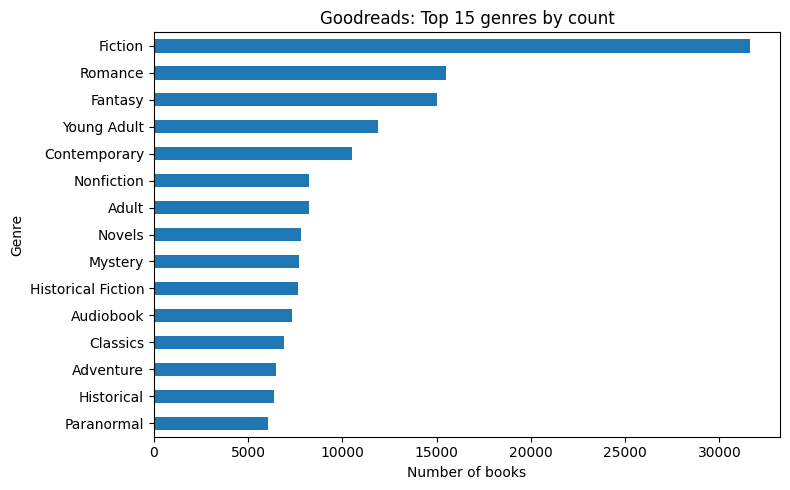

In [17]:
#graph that shows the distrbution of genres
import matplotlib.pyplot as plt
from collections import Counter

# Flatten all genre lists into one big Counter
genre_counter = Counter(
    g for genre_list in books["genres"] for g in genre_list if g
)

genre_counts = pd.Series(genre_counter).sort_values(ascending=False)

top_n = 15
top_genres = genre_counts.head(top_n)

plt.figure(figsize=(8, 5))
ax = top_genres.sort_values().plot(kind="barh")  # horizontal for readability

ax.set_xlabel("Number of books")
ax.set_ylabel("Genre")
ax.set_title(f"Goodreads: Top {top_n} genres by count")

plt.tight_layout()
plt.show()


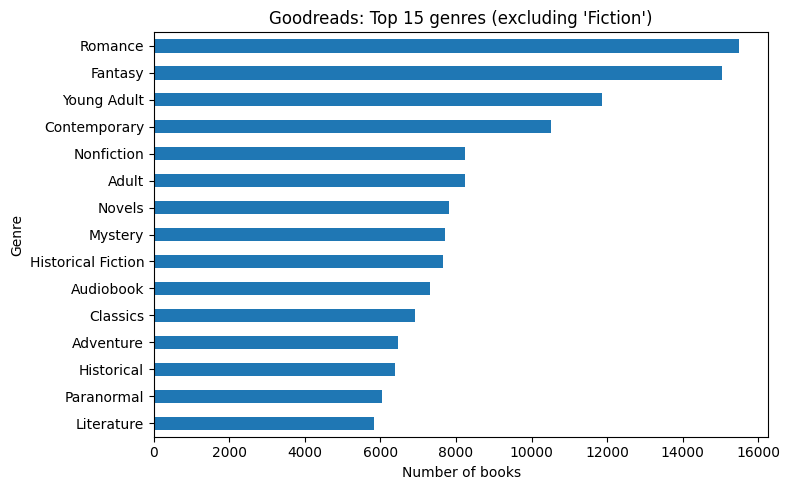

In [18]:
#graph that shows the year distrubtion of the genres (without fiction)
genre_counts = pd.Series(genre_counter).sort_values(ascending=False)

drop_genres = {"Fiction"}  # add others if needed
genre_counts = genre_counts[~genre_counts.index.isin(drop_genres)]

top_n = 15
top_genres = genre_counts.head(top_n)

plt.figure(figsize=(8, 5))
ax = top_genres.sort_values().plot(kind="barh")
ax.set_xlabel("Number of books")
ax.set_ylabel("Genre")
ax.set_title(f"Goodreads: Top {top_n} genres (excluding 'Fiction')")
plt.tight_layout()
plt.show()


In [ ]:
#data visualization to view the publication year distribution by year and by decade
import pandas as pd
import matplotlib.pyplot as plt

goodreads = df.copy()   # raw Kaggle dataframe

# 1. parse firstPublishDate explicitly as mm/dd/yy
goodreads["pub_year"] = pd.to_datetime(
    goodreads["firstPublishDate"].astype(str),
    format="%m/%d/%y",   # <-- key change
    errors="coerce"
).dt.year

# 2. keep only reasonable years so the graph is readable
years = goodreads["pub_year"].dropna()
years = years[(years >= 1800) & (years <= 2025)]

#  year-level distribution 
year_counts = years.value_counts().sort_index()

plt.figure(figsize=(8, 4))
ax = year_counts.plot(kind="bar")
ax.set_xlabel("Publication year")
ax.set_ylabel("Number of books")
ax.set_title("Goodreads: distribution of publication years")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#  decade-level distribution
decades = (years // 10) * 10
decade_counts = decades.value_counts().sort_index()

plt.figure(figsize=(8, 4))
ax = decade_counts.plot(kind="bar")
ax.set_xlabel("Decade")
ax.set_ylabel("Number of books")
ax.set_title("Goodreads: distribution by decade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
